In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 载入数据
def loadDataSet(fileName):
    dataMat =[]
    labelMat = []
    with open(fileName) as fr:
        for line in fr.readlines():
            lineArr = line.strip().split('\t')
            dataMat.append([float(lineArr[0]),float(lineArr[1])])
            labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [7]:
dataArr,labelArr = loadDataSet('./testSet.txt')

In [8]:
# 从剩余alpha索引中随机选择一个
# i aplha下标
# m 所有alpha的数目
def selectJrand(i,m):
    j = i 
    while(j == i): # 保证从剩余中选取
        j = int(np.random.uniform(1,m))
    return j

In [9]:
#  调整大于H或小于L的aplha值
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    elif aj < L:
        aj = L
    return aj

In [34]:
# 简化版SMO算法
# toler 容错率
# matiter 最大循环次数
def smoSimple(dataMatIn,classLabels,C,toler,maxIter):
    # 矩阵化
    dataMat = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    b = 0; # 
    m,n = np.shape(dataMat) # 训练数据维度
    alphas = np.mat(np.zeros((m,1)))
    iterNum = 0 # 迭代次数
    while (iterNum < maxIter):
        alphaPairsChanged = 0 # 记录alpha是否被优化
        for i in range(m):
            fXi = float(np.multiply(alphas,labelMat).T*(dataMat*dataMat[i,:].T)+b) # 计算预测值
            Ei = fXi - float(labelMat[i]) # 计算误差
            if ((labelMat[i]*Ei < -toler)and(alphas[i]<C)) or ((labelMat[i]*Ei > toler)and(alphas[i]>0)):
                # fXi*labelMat[i] - labelMat[i]^2 预测结果误差值，可正可负
                # C > alphas > 0 等于条件不会应用 clipAlpha函数，随意可以不用考虑
                j = selectJrand(i,m) # 随机选取第二个alpha，并计算预测误差
                fXj = float(np.multiply(alphas,labelMat).T*(dataMat*dataMat[j,:].T)+b)
                Ej = fXj - float(labelMat[j])
                # 防止列表索引导致的原地修改
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()
                # 计算H L 这里存在未理解内容
                if (labelMat[i] != labelMat[j]):
                    L = max(0,alphas[j] - alphas[i])
                    H = min(C,C+alphas[j] - alphas[i])
                else:
                    L = max(0,alphas[j] + alphas[i] - C)
                    H = min(C,alphas[j] + alphas[i])
                if L == H: 
                    print('H==L')
                    continue
                # 计算 alphaNew
                # eta = K11 + K22 - 2K12
                eta = 2.0 * dataMat[i,:]*dataMat[j,:].T - dataMat[i,:]*dataMat[i,:].T - dataMat[j,:]*dataMat[j,:].T # alpha[j] 的最优修改量
                if eta >= 0:
                    print("eta>=0")
                    continue
                # alpha2new = alpha2old + y2(E1-E2)/eta
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                # 剪辑alphas
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001):
                    print('j not moving enough')
                    continue
                # alpha1new = alpha1old + y1*y2(alpha2old - alpha2new)
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                # 计算b值
                b1 = b - Ei - labelMat[i]*(alphas[i] - alphaIold)*dataMat[i,:]*dataMat[i,:].T - labelMat[j]*(alphas[j] - alphaJold)*dataMat[i,:]*dataMat[j,:].T
                b2 = b - Ej - labelMat[i]*(alphas[i] - alphaIold)*dataMat[i,:]*dataMat[j,:].T - labelMat[j]*(alphas[j] - alphaJold)*dataMat[j,:]*dataMat[j,:].T
                if  (0<alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0<alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1+b2)/2.0
                alphaPairsChanged += 1
                print('iter: %d i: %d ,pairs changed %d'%(iterNum,i,alphaPairsChanged))
        if (alphaPairsChanged == 0):
            iterNum += 1
        else:
            iterNum = 0
        print('iteration number: %d'%iterNum)
    return b,alphas

In [104]:
b ,alphas = smoSimple(dataArr,labelArr,0.6,0.001,40)

H==L
iter: 0 i: 1 ,pairs changed 1
H==L
j not moving enough
iter: 0 i: 5 ,pairs changed 2
j not moving enough
iter: 0 i: 8 ,pairs changed 3
iter: 0 i: 12 ,pairs changed 4
H==L
iter: 0 i: 17 ,pairs changed 5
H==L
j not moving enough
iter: 0 i: 23 ,pairs changed 6
H==L
j not moving enough
H==L
H==L
iter: 0 i: 33 ,pairs changed 7
iter: 0 i: 34 ,pairs changed 8
H==L
H==L
j not moving enough
H==L
H==L
H==L
j not moving enough
j not moving enough
j not moving enough
iter: 0 i: 71 ,pairs changed 9
j not moving enough
H==L
j not moving enough
iteration number: 0
iter: 0 i: 1 ,pairs changed 1
H==L
iter: 0 i: 5 ,pairs changed 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
H==L
H==L
j not moving enough
j not moving enough
H==L
j not moving enough
H==L
iter: 0 i: 55 ,pairs changed 3
j not moving enough
iter: 0 i: 57 ,pairs changed 4
j not moving enough
H==L
j not moving enough
H==L
j not moving enough
j not moving enough
j not moving enough
H=

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
iter: 12 i: 29 ,pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
iter: 0 i: 17 ,pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving eno

iteration number: 7
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
iter: 13 i: 52 ,pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iter

In [105]:
b


matrix([[-3.7740155]])

In [106]:
alphas[alphas >0]

matrix([[ 0.12775409,  0.23571032,  0.00075429,  0.3642187 ]])

In [125]:
for i in range(100):
    if alphas[i] > 0.0:
        print(str(dataArr[i])+str(labelArr[i]))

[4.658191, 3.507396]-1.0
[3.457096, -0.082216]-1.0
[2.893743, -1.643468]-1.0
[6.080573, 0.418886]1.0


In [131]:
def clacWs(alphas,dataArr,labelArr):
    dataMat = np.mat(dataArr)
    labelMat = np.mat(labelArr).transpose()
    m,n= np.shape(dataArr)
    weights = np.zeros((n,1))
    for i in range(m):
        weights += np.multiply(alphas[i]*labelMat[i],dataMat[i,:].T)
    return weights

In [134]:
weights = clacWs(alphas,dataArr,labelArr)

In [130]:
def classify(weights,b,dataArr):
    dataMat = np.mat(dataArr)
    return dataMat[0]*weights+b

In [135]:
classify(weights,b,[3.542485,1.977398])

matrix([[-1.47475822]])

In [136]:
# plot with matplotlib
def plotBestFit(alphas,b,dataArr,labelArr):
    dataMat = np.mat(dataArr)
    labelMat = np.mat(labelArr).transpose()
    m,n= np.shape(dataArr)
    # 绘制两类数据点
    xcord1 = []
    xcord2 = []
    ycord1 = []
    ycord2 = []
    for i in range(m):
        if int(labelMat[i,0]) == 1.0:
            xcord1.append(dataMat[i,0])
            ycord1.append(dataMat[i,1])
        else:
            xcord2.append(dataMat[i,0])
            ycord2.append(dataMat[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s= 30,c = 'red',marker = 's')
    ax.scatter(xcord2,ycord2,s= 30,c = 'blue')
    # 绘制支持向量
    spVector = np.array([[dataMat[i,0],dataMat[i,1]] for i in range(m) if alphas[i] > 0.0])
    ax.scatter(spVector[:,0],spVector[:,1],s= 30,c = 'black')
    # 绘制决策边界
    x1 = np.arange(-1.0,10.0,0.1)
    weights = np.zeros((n,1))
    for i in range(m):
        weights += np.multiply(alphas[i]*labelMat[i],dataMat[i,:].T)
    x2 = -(b+ weights[0]*x1)/weights[1] # 0 = w0*x0 + w1*x1 + w2*x2
    ax.plot(x1,x2.getA1()) # 注意这里的维度问题 mat对象即使扁平化也是1*n维度的，getA1() 获得一个数组
    plt.xlabel("X1")
    plt.ylabel('X2')
    plt.show()

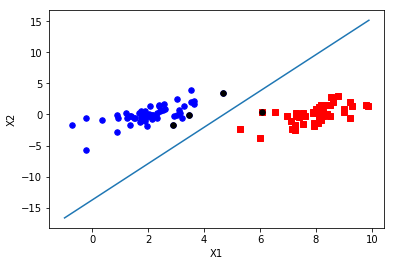

In [137]:
plotBestFit(alphas,b,dataArr,labelArr)